## Choosing variables in classification model

#### Inspect the variables importance to understand the relationships better

#### Tags:
    Data: labeled data, Kaggle competition
    Technologies: python, pandas, scikit-learn
    Techniques: feature importance
    
#### Resources:
[UCI Machine Learning Repository - Default of Credit Clients](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#)

[ROC curve and AUC](https://www.youtube.com/watch?v=OAl6eAyP-yo)

[Relative variable importance in Boosting](https://stats.stackexchange.com/questions/162162/relative-variable-importance-for-boosting)


## Feature importance 

In order to understand the feature importances better we can use one of the tree ensembles. In this case we will use the Gradient Boosting Classifier to find the importance scores for each of the features (variables). 

Generaly speaking a feature is more important the more it is useful in construction of the tree ensemble. If the feature helps a lot with increasing the performance measure at each new iteration then its importance will rise. The relative importance of each feature is calcualted for each tree and then averaged over all the trees.

In sklearn there is a useful class in feature_selection.SelectFromModel which can help to identify which features could be used to achive a certain threshold in metric used.





In [12]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_curve

from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

In [2]:
# import the relevant dataset
df = pd.read_excel('../data/default-of-credit-card-clients.xls',skiprows=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [3]:
df = pd.get_dummies(df,columns=['SEX','EDUCATION','MARRIAGE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                

##### There are 30000 observations and there are all numeric in character 

In [4]:
X = df.drop(['ID','default payment next month'],axis=1)

y = df['default payment next month']

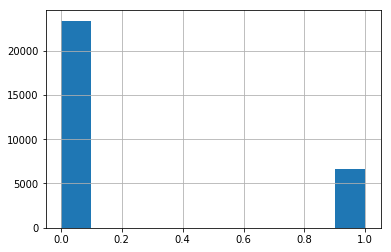

In [5]:
df["default payment next month"].hist()

In [6]:
counts = df["default payment next month"].value_counts()
counts[0]

23364

In [7]:
prop_defaulted = counts[1] / counts.sum()
print('Proportion of defaulted in the dataset: {}'.format(prop_defaulted))

Proportion of defaulted in the dataset: 0.2212


In [9]:
# split the data into the trainging and evaluation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# prepare the parameters for the grid search for each of the classifiers

parameters = {'learning_rate':[0.05,0.1,0.2], 'min_samples_split':[2,10], 'max_depth':[3,5,7], 'max_features':['auto','sqrt']}

model = GradientBoostingClassifier(random_state=42)

cv = GridSearchCV(model,parameters, cv=5, scoring='roc_auc', verbose=2, n_jobs=3)

cv.fit(X_train, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   34.3s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  3.5min
[Parallel(n_jobs=3)]: Done 180 out of 180 | elapsed:  4.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'learning_rate': [0.05, 0.1, 0.2], 'min_samples_split': [2, 10], 'max_depth': [3, 5, 7], 'max_features': ['auto', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [16]:
# the best estimator from the cross-validation
cv.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [26]:
# setting up the best classifier, so that later we can use the feature_importances_ method
model = cv.best_estimator_
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [28]:
y_pred = model.predict(X_test)

In [20]:
# calculating interesting metrics

conf_matrix = confusion_matrix(y_test, list(y_pred))
acc_score = accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

auc_score = auc(fpr, tpr)

results = {'accuracy':acc_score, 'auc':auc_score}


In [21]:
# model results on the test set

results

{'accuracy': 0.819, 'auc': 0.6500412493859715}

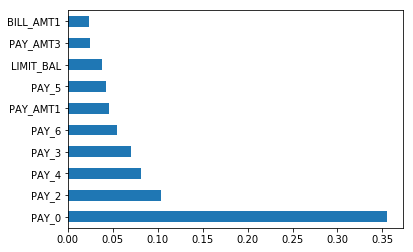

In [32]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Conclusions

The variable PAY_0 ('the repayment status in September, 2005') is the most important variable in this model. Also the other PAY_2 variables are close behind. This suggests that the last months payment status helps the most in making the models performance metric increase.

Now we could use the feature importances to find the a perhaps simpler model that would still perfrom good on the data that we have and would have less features. 

The feature selection is also possible using sklearn so that the whole process is streamlined.